# Python для сбора и анализа данных

*Алла Тамбовцева, НИУ ВШЭ*

## Операции с  датафреймами `pandas`: часть 1

* Загрузка данных
* Знакомство с данными
* Переименование столбцов
* Выбор и описание одного столбца
* Выбор нескольких столбцов и строк, методы `.loc` и `.iloc`
* Фильтрация строк по условиям
* Немного визуализации: гистограммы

### Загрузка  данных

Как мы уже убедились, библиотека `pandas` позволяет создавать датафреймы – удобные структуры для данных в табличном виде. Датафрейм можно получить из списка списков, из списка словарей, из словаря, простого или сложного. Но если наша задача – не преобразовать собранные  данные (например, выгруженные с веб-страницы), а обработать уже готовые из имеющегося файла, библиотека `pandas` тоже будет чрезвычайно полезна. 

Импортируем ее с сокращенным названием `pd`:

In [2]:
import pandas as pd

Библиотека `pandas` умеет загружать данные из файлов разных форматов. Среди них файлы Excel (расширения `.xls` и `.xlsx`), Stata (расширение `.dta`), SPSS (расширение `.sav`), текстовые файлы в формате TXT, CSV, JSON и другие. Мы поработаем с форматом CSV, одним из самых распространенных машиночитаемых форматов, название которого расшифровывается как *Comma Separated Values*, то есть «значения, разделенные запятыми». Такое название объясняется просто: внутри такого файла данные в табличном виде записаны так, что значения, относящиеся к разным столбцам, отграничены друг от друга запятыми. Например, таблица со столбцами A, B, C и числовыми значениями в них, в CSV будет выглядеть следующим образом:

Однако на практике можно столкнуться и с менее классическими вариантами этого формата. Например, если открыть файл CSV в Excel, он автоматически изменит разделитель `,` на `;`, чтобы точно не перепутать запятую как разделитель столбцов и запятую как десятичный разделить (между целой и дробной частью в числах). В таких случаях символ для разделителя нужно будет указать внутри аргумента `sep` в соответствующей функции, например, `sep = ";"`. 

Перейдем к нашему файлу `Salaries.csv`. Если файл сохранен на компьютере, у нас два пути:

1. Поместить его в рабочую папку (рядом с ipynb-файлом, в котором пишем код для загрузки данных) через кнопку *Upload* на главной странице *Home* в Jupyter.
2. Найти файл на компьютере, кликнуть правой клавишей, зайти в свойства и скопировать полный путь к файлу из его расположения.

В первом случае все просто, вызываем функцию `read_csv()` и помещаем в нее название файла в виде строки:

In [3]:
dat = pd.read_csv("Salaries.csv")

Во втором случае нужно учесть важный момент: слэши в пути должны быть такие `/`,  а не такие `\`. Слэш в обратную сторону внутри строки Python воспринимает как специальный символ, плюс, сочетание `\U`, которое неизбежно возникает при наличии папки `Users` будет намекать Python на кодировку символов в [Unicode](https://en.wikipedia.org/wiki/Unicode). На Mac и Linux таких слэшей в пути к файлу не возникает, а на Windows, чтобы не заменять каждый слэш вручную, можно перед кавычками поставить букву `r`:

In [ ]:
dat = pd.read_csv(r"C:\Users\student\Desktop\Salaries.csv")

*Примечание для Google Colab.* Загрузить файл с данными в облачное хранилище можно через кнопку *Files* (значок папки слева от рабочей области с ячейками), при нажатии на которую появляется возможность выбрать файл с компьютера (значок стрелки). После добавления файла его можно выбрать, кликнуть на три точки справа от названия, скопировать путь через *Copy path* и вставить его в функцию `read_csv()`.

Итак, если никаких сообщений об ошибках не было (если `FileNotFoundError`, файл не найден, проверьте, нет ли опечаток в названии, и лежит ли файл в той папке, к которой мы прописали путь или в которой лежит текущий ipynb-файл), данные благополучно сохранились в виде датафрейма `dat`.  

*Примечание.* Если вы планируете работать с файлами Excel, логика та же, только функция будет `read_excel()`. По умолчанию она считывает только первый лист файла, но в аргументе `sheet_name` можно указать индекс или название листа. Про другие, более продвинутые, опции вроде тех, что позволяют пропускать первые несколько строк в файле или, наоборот, загружать только определенный фрагмент таблицы, можно узнать, запросив `help(pd.read_excel)`.

### Знакомство с данными

В этом файле сохранены данные по сотрудникам университета в США, а именно следующие их характеристики:

* `rank`: должность;
* `discipline`: тип преподаваемой дисциплины (`A` – теоретическая, `B` – практическая);
* `yrs.since.phd`: число лет с момента получения степени PhD;
* `yrs.service`: число лет опыта работы;
* `sex`: пол;
* `salary`: заработная плата за 9 месяцев, в долларах.

Приступим к изучению содержимого датафрейма.

Если датафрейм большой, а мы хотим быстро посмотреть на то, какого он вида, можем запросить на экран только первые строчки или последние:

In [4]:
# первые 5

dat.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [5]:
# последние 5

dat.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


Если нам нужно другое число строк (не 5, которые показываются по умолчанию), это легко исправить:

In [6]:
dat.head(10)

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
5,6,AssocProf,B,6,6,Male,97000
6,7,Prof,B,30,23,Male,175000
7,8,Prof,B,45,45,Male,147765
8,9,Prof,B,21,20,Male,119250
9,10,Prof,B,18,18,Female,129000


Выяснить размерность датафрейма можно с помощью атрибута `.shape`, в нем хранится кортеж с числом строк и числом столбцов:

In [7]:
dat.shape

(397, 7)

При желании можно извлечь только одно из чисел:

In [8]:
dat.shape[0]

397

In [9]:
dat.shape[1]

7

*Примечание.* Атрибут – некоторая фиксированная характеристика объекта (число строк или столбцов в датафрейме, названия строк или столбцов, тип данных), метод – функция, которая выполняет некоторую операцию над объектом. И атрибуты, и методы вызываются через точку, но в конце метода всегда есть круглые скобки (например, `.info()` ниже), они означают, что мы хотим применить метод, а не просто вызвать и посмотреть на него.

Техническое описание датафрейма можно получить, применив метод `.info()`:

In [10]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     397 non-null    int64 
 1   rank           397 non-null    object
 2   discipline     397 non-null    object
 3   yrs.since.phd  397 non-null    int64 
 4   yrs.service    397 non-null    int64 
 5   sex            397 non-null    object
 6   salary         397 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 21.8+ KB


Какую информацию выдал метод `.info()`? Во-первых, он сообщил нам, что `dat` является объектом `DataFrame`. Во-вторых, он вывел число строк (`RangeIndex: 397 entries`) и показал их индексы (`0 to 396`). В-третьих, он вывел число столбцов (`total 7 columns`). Наконец, он выдал информацию по каждому столбцу. Остановимся на этом поподробнее.

В выдаче выше представлено, сколько непустых элементов содержится в каждом столбце. Непустые элементы `non-null` – это все, кроме пропущенных значений, которые кодируются особым образом (`NaN` – от *Not A Number*). В нашей таблице все столбцы заполнены полностью. Далее указан тип каждого столбца, целочисленный `int64` и строковый `object`. Числа в конце означают объем памяти, который требуется для хранения, они зависят от битности системы.

Сводную статистическую информацию можно получить с помощью метода `.describe()`.

In [11]:
dat.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


По умолчанию этот метод выбирает только числовые столбцы и выводит для них описательные статистики:

* `count` – число заполненных значений;
* `mean` – среднее арифметическое;
* `std` – стандартное отклонение (показатель разброса данных относительно среднего значения);
* `min` – минимальное значение;
* `max` – максимальное значение;
* `25%` – нижний квартиль (значение, которое 25% значений не превышают);
* `50%` – медиана (значение, которое 50% значений не превышают);
* `75%` – верхний квартиль (значение, которое 75% значений не превышают).

Если мы хотим описать только текстовые столбцы, нужно указать соответствующий тип внутри аргумента `include`:

In [12]:
dat.describe(include = "object")

,rank,discipline,sex
count,397,397,397
unique,3,2,2
top,Prof,B,Male
freq,266,216,358


В таблице выше добавились новые строки `unique`, `top` и `freq`:

* `unique` – число уникальных значений в столбце (в `sex` их 2, `Male` и `Female`);

* `top` – мода, значение, которое встречается чаще всех (в `sex` больше значений `Male`, в выборке больше сотрудников-мужчин);

* `freq` – частота для значения в `top` (в `sex` 358, в выборке 358 сотрудников-мужчин).

Можно включить в описание все типы сразу, но это будет довольно громоздко (там, где характеристика неприменима, ставится пропуск `NaN`):

In [13]:
dat.describe(include = "all")

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397,397,397.000000,397.000000,397,397.000000
unique,NaN,3,2,NaN,NaN,2,NaN
top,NaN,Prof,B,NaN,NaN,Male,NaN
freq,NaN,266,216,NaN,NaN,358,NaN
mean,199.000000,NaN,NaN,22.314861,17.614610,NaN,113706.458438
std,114.748275,NaN,NaN,12.887003,13.006024,NaN,30289.038695
min,1.000000,NaN,NaN,1.000000,0.000000,NaN,57800.000000
25%,100.000000,NaN,NaN,12.000000,7.000000,NaN,91000.000000
50%,199.000000,NaN,NaN,21.000000,16.000000,NaN,107300.000000
75%,298.000000,NaN,NaN,32.000000,27.000000,NaN,134185.000000


Если мы хотим запросить отдельно названия строк, нам пригодится атрибут `.index`:

In [14]:
dat.index

RangeIndex(start=0, stop=397, step=1)

А если столбцов – то атрибут `.columns`:

In [15]:
dat.columns

Index(['Unnamed: 0', 'rank', 'discipline', 'yrs.since.phd', 'yrs.service',
       'sex', 'salary'],
      dtype='object')

### Переименование столбцов

Давайте для удобства дальнейшей работы переименуем некоторые столбцы с длинными названиями. Так, вместо `yrs.since.phd` назовем столбец `phd`, а вместо `yrs.service` поставим `service`. Для этого нам понадобится метод `.rename()`. По умолчанию он работает со строками, поэтому, если мы переименовываем столбцы, нужно явно это указать, записав название аргумента `columns`:

In [16]:
dat.rename(columns = {"yrs.since.phd" : "phd", 
                      "yrs.service" : "service"})

,Unnamed: 0,rank,discipline,phd,service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


Соответствия старых и новых значений задаются в виде словаря, где ключами являются старые названия, а значениями – новые. Здесь стоит обратить внимание на один важный момент: метод `.rename()` работает осторожно, он не вносит изменения в исходный датафрейм, а возвращает его измененную копию. Если мы хотим сохранить изменения, нужно перезаписать датафрейм через `=` с тем же названием:

In [17]:
dat = dat.rename(columns = {"yrs.since.phd" : "phd", 
                      "yrs.service" : "service"})

Или сделать то же самое, но более изящно, добавив аргумент `inplace = True` (то же, что и выше, но без `=`, ставим новые названия на место старых):

In [18]:
dat.rename(columns = {"yrs.since.phd" : "phd", 
                      "yrs.service" : "service"}, inplace = True)

### Выбор одного столбца

Теперь поработаем с отдельными столбцами. Для выбора столбца достаточно указать его название в квадратных скобках (и обязательно в кавычках, так как название является строкой):

In [19]:
dat["salary"]

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

Еще столбец можно выбрать, не используя квадратные скобки, а просто указав его название через точку:

In [20]:
dat.salary

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

Однако такой способ не универсален. В случае, если в названии столбца используются недопустимые для переменных символы (пробелы, тире, кириллические буквы), этот метод не подойдет. Для создания нового столбца этот способ тоже не сработает.

Теперь опишем выбранный столбец. Для числового столбца вполне логично использовать метод `.describe()`, он работает и для отдельных столбцов тоже:

In [21]:
dat["salary"].describe()

count       397.000000
mean     113706.458438
std       30289.038695
min       57800.000000
25%       91000.000000
50%      107300.000000
75%      134185.000000
max      231545.000000
Name: salary, dtype: float64

Все характеристики, которые выдает этот метод, можно запросить по-отдельности:

In [22]:
# число непустых значений

dat["salary"].count()

397

In [23]:
# среднее

dat["salary"].mean()

113706.45843828715

In [24]:
# медиана – квантиль уровня 0.5

dat["salary"].quantile(0.5)

107300.0

In [25]:
# нижний квартиль – квантиль уровня 0.25

dat["salary"].quantile(0.25)

91000.0

In [26]:
# оба квартиля сразу

dat["salary"].quantile([0.25, 0.75])

0.25     91000.0
0.75    134185.0
Name: salary, dtype: float64

Текстовые столбцы тоже можно описывать, только вряд ли будет уместно будет считать для них среднее, медиану или что-то подобное. Поэтому мы посмотрим на уникальные значения и их частоты:

In [27]:
dat["sex"].unique()

array(['Male', 'Female'], dtype=object)

In [28]:
dat["sex"].value_counts()

Male      358
Female     39
Name: sex, dtype: int64

### Выбор нескольких столбцов (и строк)

Если нам нужно сразу несколько столбцов (маленький датафрейм на основе старого), то названия столбцов необходимо оформить в виде списка и указать его в квадратных скобках:

In [29]:
small = dat[["sex", "rank", "salary"]] 
small

,sex,rank,salary
0,Male,Prof,139750
1,Male,Prof,173200
2,Male,AsstProf,79750
3,Male,Prof,115000
4,Male,Prof,141500
...,...,...,...
392,Male,Prof,103106
393,Male,Prof,150564
394,Male,Prof,101738
395,Male,Prof,95329


Если нам нужно несколько столбцов подряд, начиная с одного названия и заканчивая другим, можно воспользоваться методом `.loc`:

In [30]:
dat.loc[:, "rank" : "service"]

,rank,discipline,phd,service
0,Prof,B,19,18
1,Prof,B,20,16
2,AsstProf,B,4,3
3,Prof,B,45,39
4,Prof,B,40,41
...,...,...,...,...
392,Prof,A,33,30
393,Prof,A,31,19
394,Prof,A,42,25
395,Prof,A,25,15


Метод `.loc` используется для выбора определенных строк и столбцов, поэтому в квадратных скобках образуется запись через запятую: на первом месте условия для строк, на втором – для столбцов. Здесь нас интересуют все строки (полный срез через `:`) и конкретные столбцы, с `rank` по `service` включительно.

Если бы мы хотели выбрать строки с 0 по 10 и столбцы с `rank` по `service`, тоже бы пригодился метод `.loc`:

In [31]:
dat.loc[0:10, "rank" : "service"]

,rank,discipline,phd,service
0,Prof,B,19,18
1,Prof,B,20,16
2,AsstProf,B,4,3
3,Prof,B,45,39
4,Prof,B,40,41
5,AssocProf,B,6,6
6,Prof,B,30,23
7,Prof,B,45,45
8,Prof,B,21,20
9,Prof,B,18,18


**Внимание:** хотя в `.loc` мы вроде как задействуем обычные питоновские срезы, внутри этого метода срезы включают как левый, так и правый конец. Так, в примере выше были выбраны строки по 10-ую включительно и столбец `service` также был включен.

Иногда может возникнуть необходимость выбрать столбец по его порядковому номеру. Например, когда названий столбцов нет как таковых или когда названия слишком длинные, а переименовывать их нежелательно. Сделать это можно с помощью метода `.iloc` (`i` – от *index*). Выберем строки с 0 по 9 и столбцы с 0 по 3:

In [32]:
dat.iloc[0:10, 0:4]

,Unnamed: 0,rank,discipline,phd
0,1,Prof,B,19
1,2,Prof,B,20
2,3,AsstProf,B,4
3,4,Prof,B,45
4,5,Prof,B,40
5,6,AssocProf,B,6
6,7,Prof,B,30
7,8,Prof,B,45
8,9,Prof,B,21
9,10,Prof,B,18


**Внимание:** в методе `.iloc`, поскольку работа идет с обычными числовыми индексами (как в списках и кортежах), правый конец среза исключается. Поэтому в примере выше 10-я строка и 4-ый столбец показаны не были.

Если в `.iloc` вписать только одно число, по умолчанию будет выдана строка с таким номером:

In [33]:
dat.iloc[2]

Unnamed: 0           3
rank          AsstProf
discipline           B
phd                  4
service              3
sex               Male
salary           79750
Name: 2, dtype: object

Это будет объект типа `pandas Series`, своего рода срез датафрейма:

In [34]:
type(dat.iloc[2])

pandas.core.series.Series

### Фильтрация строк

Часто при работе с датафреймом нас не интересует выбор отдельных строк по названию или номеру, а интересует фильтрация наблюдений – выбор строк датафрейма, которые удовлетворяют определенному условию. Для этого интересующее нас условие необходимо указать в квадратных скобках. Например, выберем только те строки, которые соответствуют сотрудникам с опытом работы более 10 лет:

In [35]:
dat[dat["service"] > 10]

,Unnamed: 0,rank,discipline,phd,service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
6,7,Prof,B,30,23,Male,175000
...,...,...,...,...,...,...,...
391,392,Prof,A,30,19,Male,151292
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738


Почему нельзя было написать проще, то есть `dat["service"] > 10`? Давайте напишем, и посмотрим, что получится:

In [36]:
dat["service"] > 10

0       True
1       True
2      False
3       True
4       True
       ...  
392     True
393     True
394     True
395     True
396    False
Name: service, Length: 397, dtype: bool

Что мы увидели? Просто результат проверки условия для каждой строки датафрейма, набор из `True` и `False`. Когда мы подставляем это выражение в квадратные скобки, Python выбирает из `dat` те строки, где выражение принимает значение `True`.

Все символьные операторы для объединения условий работают как обычно, только тут важно не забывать про круглые скобки вокруг каждого условия. Например, выберем сотрудников женского пола со стажем более 10 лет:

In [37]:
# одновременное выполнение условий

dat[(dat["service"] > 10) & (dat["sex"] == "Female")]

,Unnamed: 0,rank,discipline,phd,service,sex,salary
9,10,Prof,B,18,18,Female,129000
19,20,Prof,A,39,36,Female,137000
47,48,Prof,B,23,19,Female,151768
48,49,Prof,B,25,25,Female,140096
63,64,AssocProf,B,11,11,Female,103613
68,69,Prof,B,17,17,Female,111512
84,85,Prof,B,17,18,Female,122960
103,104,Prof,B,20,14,Female,127512
123,124,AssocProf,A,25,22,Female,62884
148,149,Prof,B,36,26,Female,144651


А теперь выберем профессоров или доцентов:

In [38]:
# или одно верно, или другое, или оба

dat[(dat["rank"] == "Prof") | (dat["rank"] == "AssocProf")]

,Unnamed: 0,rank,discipline,phd,service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
5,6,AssocProf,B,6,6,Male,97000
...,...,...,...,...,...,...,...
391,392,Prof,A,30,19,Male,151292
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738


Если бы разных значений с подстрокой `"Prof"` в `rank` было много, было бы неудобно прописывать через `|` однотипные условия для каждой должности. Тогда логично было бы воспользоваться методом, который позволяет выбрать все строки, где в ячейке с текстом встречается слово "Prof". Такой метод есть – это метод на строках `.contains()`, который возвращает `True`, если некоторая подстрока входит в строку, и `False` – в противном случае.

In [39]:
# в нашем случае это все строки

dat[dat["rank"].str.contains("Prof")]

,Unnamed: 0,rank,discipline,phd,service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


А если наоборот, нам нужно отрицание – все строки, которые относятся к чему угодно, только не к `"Prof"`? Можно воспользоваться оператором `~` для отрицания и поставить его перед всем условием в скобках:

In [40]:
# таких нет, у всех Prof встречается в названии должности
# пустой датафрейм

dat[~dat["rank"].str.contains("Prof")]

,Unnamed: 0,rank,discipline,phd,service,sex,salary


**NB.** В наборе методов `str` много разных методов помимо `.contains()`, это методы на строках, которые есть и в базовом Python вроде `.startswith()` и `.endswith()`. У большинства методов есть дополнительные аргументы для учёта регистра (по умолчанию проверяется точное совпадение, но зафиксировать, что регистр не важен тоже можно, тогда не будет учитываться, заглавные ли буквы или строчные).  Можете почитать про эти [методы](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.html) в документации.

Если нам необходимо отфильтровать строки, проверив, попадает ли значение в столбце в некоторый перечень, альтернатива нескольким условиям с оператором «или» – метод `.isin()`. Для примера найдём профессоров или доцентов:

In [42]:
dat[dat["rank"].isin(["Prof", "AssocProf"])]

,Unnamed: 0,rank,discipline,phd,service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
5,6,AssocProf,B,6,6,Male,97000
...,...,...,...,...,...,...,...
391,392,Prof,A,30,19,Male,151292
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738


Для числовых данных это тоже работает:

In [43]:
dat[dat["service"].isin([10, 20, 30])]

,Unnamed: 0,rank,discipline,phd,service,sex,salary
8,9,Prof,B,21,20,Male,119250
16,17,Prof,B,19,20,Male,101000
22,23,Prof,A,34,30,Male,93904
82,83,Prof,B,22,20,Male,144640
94,95,Prof,B,21,20,Male,123683
104,105,AssocProf,A,18,10,Male,83850
128,129,Prof,A,32,30,Male,113278
141,142,AssocProf,A,15,10,Male,81500
153,154,AssocProf,B,12,10,Female,103994
173,174,Prof,B,20,20,Male,134185


**NB.** Метод `.isin()` в случае числовых значений не создаёт интервалы из целых чисел, он проверяет равенство каждому числу в отдельности.

### Немного визуализации: гистограммы

Выберем столбец со значениями заработной платы и построим гистограмму:

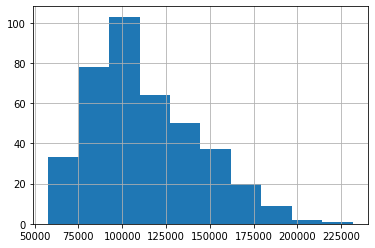

In [47]:
dat["salary"].hist()

Библиотека `pandas` использует возможности другой библиотеки `matplotlib`, которая используется для построения графиков и устанавливается при установке `pandas`. Графические функции этой библиотеки (функция `hist()` здесь выступает как метод `.hist()` на объекте типа *pandas Series*) по умолчанию возвращают два результата:

* «оси» графика (`AxesSubplot`): канва графика, временно хранится в какой-то ячейке памяти; именно её элементы мы изменяем, когда настраиваем график, устанавливая цвет, интервалы значений, подписи к осям и прочее;

* сам график, материальное изображение, которое потом можно выгрузить в файл с подходящим расширением (`.png`, `.jpeg`, например).

Если поставить в конце строки с графической функцией/методом точку с запятой, информация о ячейке памяти скроется, и мы уидим только сам график:

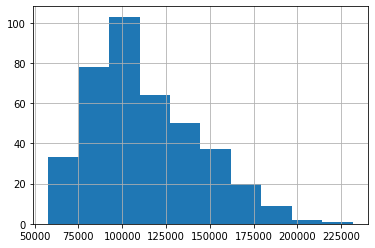

In [48]:
dat["salary"].hist();

Изменим цвет заливки и цвет границ столбцов:

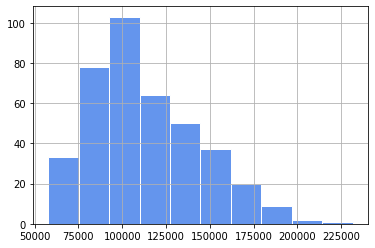

In [50]:
dat["salary"].hist(color = "cornflowerblue", edgecolor = "white");

В качестве названия цвета можно использовать шестнадцатеричный код, часто используемый в веб-дизайне (формат HEX). Код любого желаемого цвета можно получить, воспользовавшись соответствующими ресурсами вроде [палитры](https://g.co/kgs/tX2iyYd) Google или [Color picker](https://htmlcolorcodes.com/color-picker/).

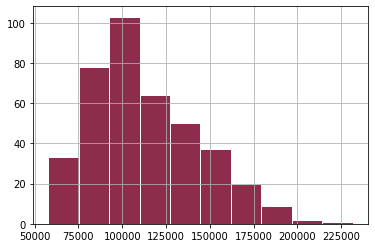

In [51]:
dat["salary"].hist(color = "#8D2D4B", edgecolor = "white");

График можем сделать побольше – размер указывается в дюймах:

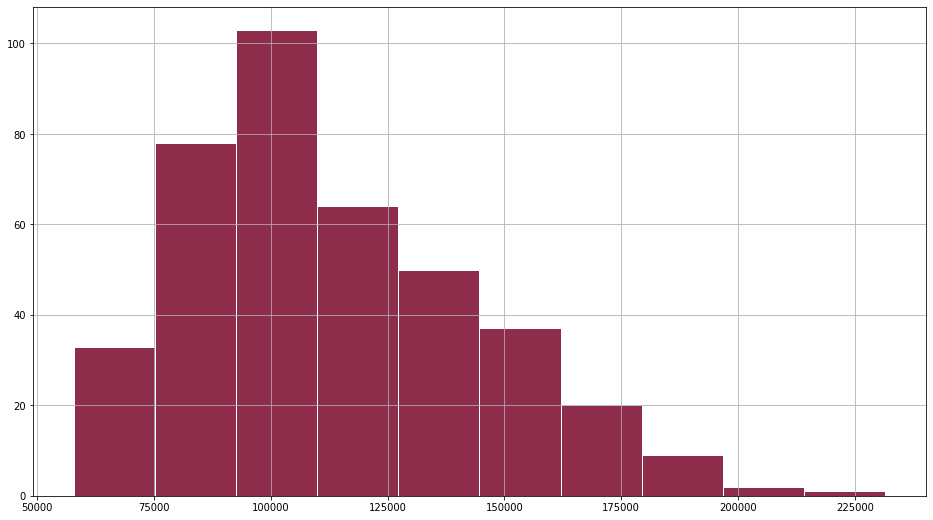

In [52]:
dat["salary"].hist(color = "#8D2D4B", edgecolor = "white", figsize = (16, 9));

Можем убрать сетку (*grid*), которая помогает определять координаты точек:

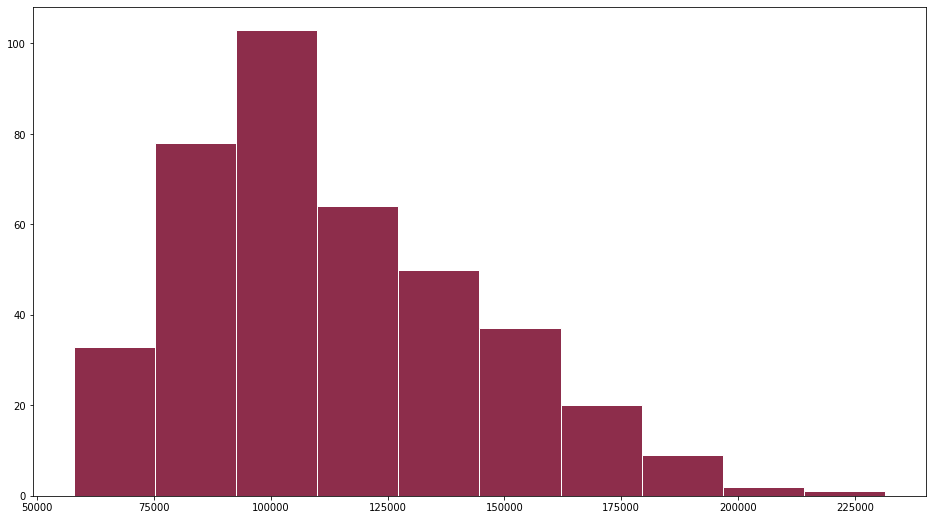

In [53]:
dat["salary"].hist(color = "#8D2D4B", 
                   edgecolor = "white", 
                   figsize = (16, 9),
                   grid = False);

Скорректируем число столбцов:

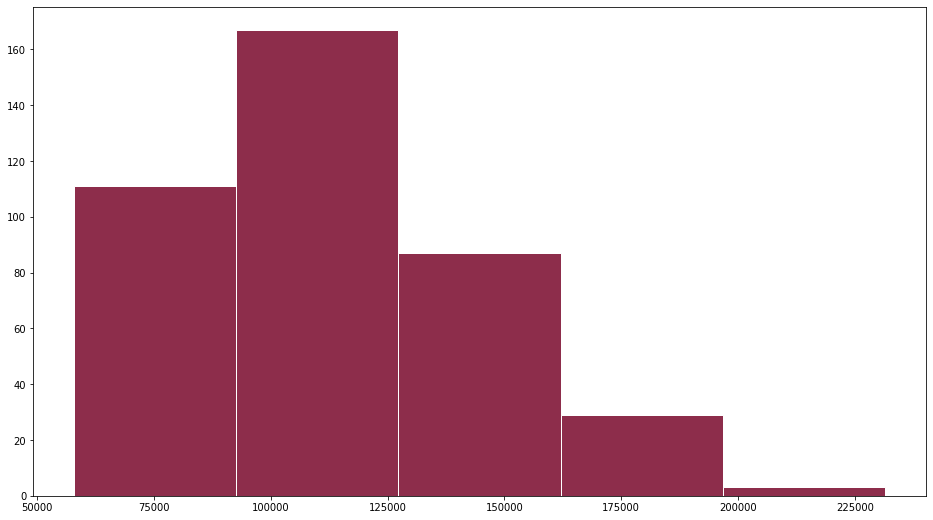

In [54]:
dat["salary"].hist(color = "#8D2D4B", 
                   edgecolor = "white", 
                   figsize = (16, 9),
                   grid = False,
                   bins = 5);

Если в аргумент `bins` вписать целое число $n$, будет создана последовательность из $n+1$ разделителей (левая граница гистограммы, «перегородки» между столбцами и правая граница гистограммы). В аргумент `bins` можно вписать и саму последовательность разделителей, если очень нужна гистограмма с определённым шагом (шириной столбца).

Допустим, мы хотим получить гистограмму с шагом, равным округлённому стандартному отклонению. Вычислим его и создадим перечень значений от минимального до максимального с заданным шагом:

In [58]:
s = round(dat["salary"].std())
min_ = dat["salary"].min()
max_ = dat["salary"].max()

# чтобы не потерять сам максимум (интервал не делится нацело на шаг)
# для надежности увеличиваем максимум

breaks = range(min_, max_ + s, s)
print(*breaks)

57800 88089 118378 148667 178956 209245 239534


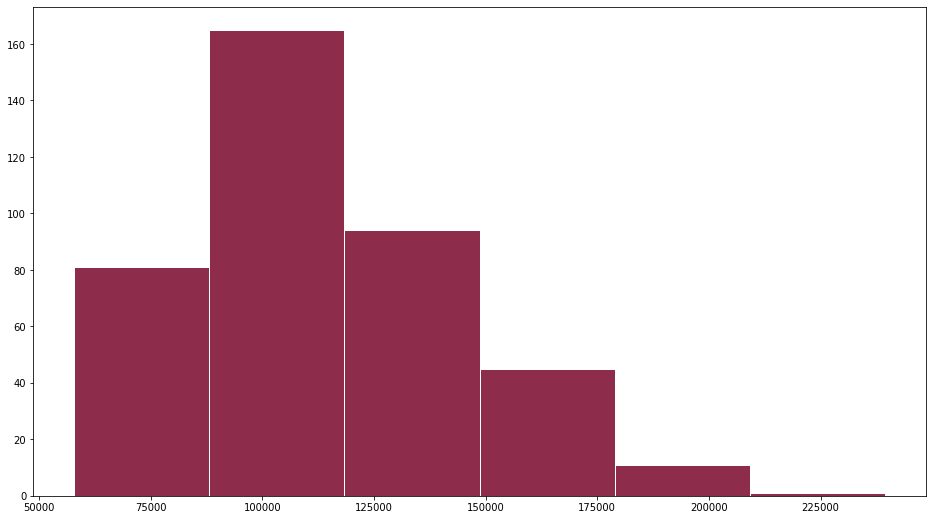

In [59]:
dat["salary"].hist(color = "#8D2D4B", 
                   edgecolor = "white", 
                   figsize = (16, 9),
                   grid = False,
                   bins = breaks);

Графики, созданные с помощью методов `pandas`, не очень удобно сохранять в файлы, эти методы предназначены, в первую очередь, для создания графиков в рамках ipynb-файлов. Для сохранения нам понадобится импортировать модуль `pyplot` из библиотеки `matplotlib`:

In [60]:
from matplotlib import pyplot as plt

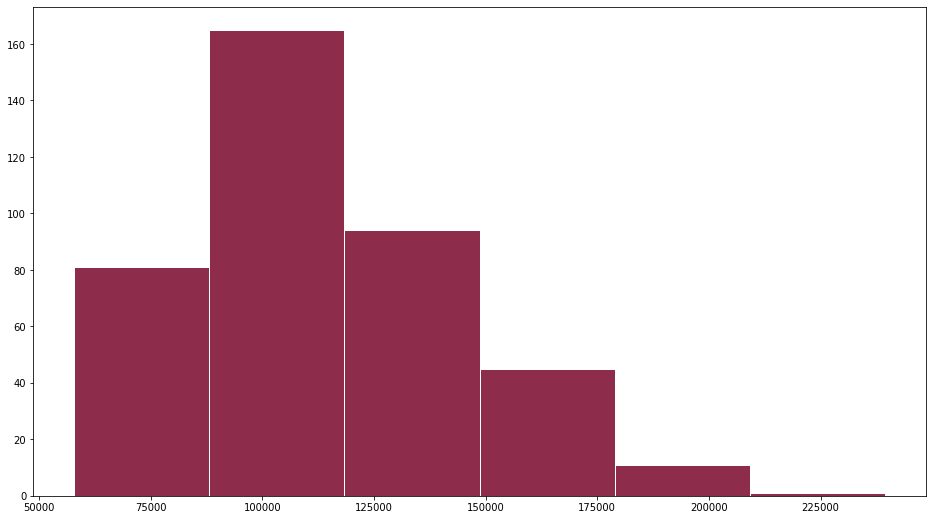

In [61]:
dat["salary"].hist(color = "#8D2D4B", 
                   edgecolor = "white", 
                   figsize = (16, 9),
                   grid = False,
                   bins = breaks);

plt.savefig("my_histogram01.png")